This notebook will show a simple example of adding two audio files (overlaying), checking them out, and then saving them. 

In [1]:
import soundfile as sf
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.signal as signal 
# setting the random seed so any computer running this code has the same output
np.random.seed(5101989)

In [2]:
# Let's pretend that this cell was never run ;).  Here I'll make the two audio clips, and save them as .wav files ;)
fs = 44100
audio0 = np.random.normal(0,0.02,fs)
audio1 = np.random.normal(0,0.5,fs*2)
sf.write('audio0.wav',audio0, fs,)
sf.write('audio1.wav',audio1, fs,)

Okay, now we'll start the 'official' task of loading and reading the files

In [3]:
# load files
playback0, samplerate = sf.read('audio0.wav')
playback1, _ = sf.read('audio1.wav', stop=fs) # you can load till the 1st second of this file, or even 
# load only a small snippet using sf.read(<filename>, start=<startsample>, stop=<stopsample>)


In [4]:
# 'overlay'/add the arrays
joint_playback = playback0 + playback1

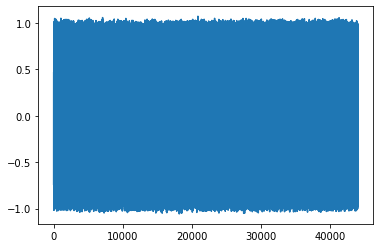

In [5]:
plt.figure()
plt.plot(joint_playback)

In [6]:
# let's check the amx sample values 
np.max(joint_playback)

1.07049560546875

Adding the sample values directly causes saturation - let's normalise it all and then reduce the max smaple value to 0.9. 

**Attention**: *it's okay to normalise the resulting audio only if the original audio files weren't saturated!!*

Text(0.5, 1.0, 'Abs. max value: 0.9')

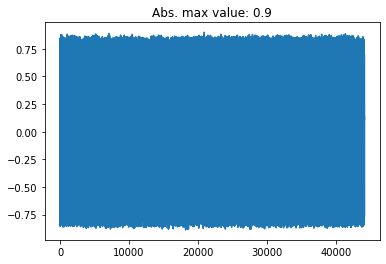

In [7]:
normalised_audio = joint_playback/np.max(np.abs(joint_playback))
normalised_audio *= 0.9
# plot it once more to be sure
plt.figure()
plt.plot(normalised_audio)
plt.title(f'Abs. max value: {np.max(np.abs(normalised_audio))}')

Anoter classic thing to do for playback signals is to window them . Window is important so the sound feels gradual when played back, and moreover, the speakers don't get damaged by a sudden movement of the membrane. 

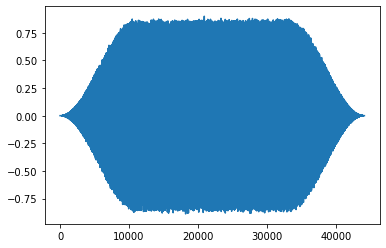

In [8]:
# check out all the possible windowing options here https://docs.scipy.org/doc/scipy/reference/signal.windows.html
# For now we'll use a Tukey window 

tukey_window = signal.tukey(normalised_audio.size) # remember the alpha parameter here, which decides how 
# sloped your Tukey window is. 
normalised_audio *= tukey_window

# visualise the windowed signal 
plt.figure()
plt.plot(normalised_audio)


Another classic thing to do is to high/low/bandpass your signal. Let's bandpass our audio between 100-15 kHz, and apply a 2nd rder Butterworth filter. 

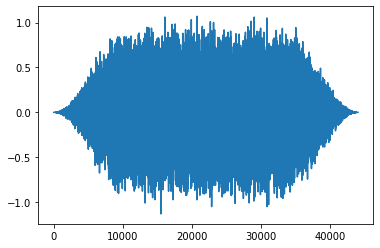

In [9]:
nyquist = fs*0.5
b,a = signal.butter(2, np.array([100,15000])/nyquist, 'bandpass') # the band-pass range is input as fraction of the nyquist frequency

# now pass the filter once :

normalised_audio_bp = signal.lfilter(b,a,normalised_audio)

# visualise the bandpassed audio
plt.figure()
plt.plot(normalised_audio_bp)


Finally, if everything looks okay, let's save the file

In [10]:
sf.write('playback_signal.wav', normalised_audio_bp, fs)

What if I want to repeat this signal with a repetition of 0.25 Hz and make a file that plays the signal 3 times? Easy, we just need to add sufficient silence in between.

For a repetition rate of 0.25 Hz, it means one playback every 4 seconds. So let's add 3 seconds of silence. Here too there are choices to be made - do you want to place the silence in the centre, at the end/beginning, etc. This depends on *your* experimental needs.

We'll just place it in the beginning, just because. 

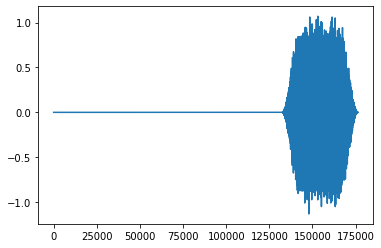

In [11]:
silence = np.zeros(3*fs)
silence_and_playback = np.concatenate((silence, normalised_audio_bp))

# visualise the playback with silence
plt.figure()
plt.plot(silence_and_playback)

All we need to do to generate the repeated pattern, is to 'tile' the original playback signal repeatedly.

In [12]:
repeated_playbacks = np.tile(silence_and_playback, 3)

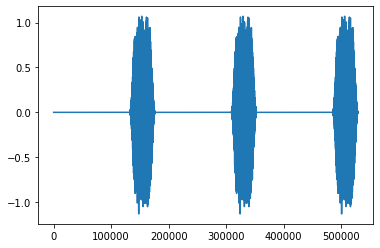

In [13]:
plt.figure()
plt.plot(repeated_playbacks)

Tadaaa --- and then this repeated playback  can be saved separately etc. etc., you know it all by now ;)!